# Open any OpenDAP link with xarray! 
### ATM407: examples for a weather case of your choice

In [37]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## Let's use free easy NCEP Reanalysis 1 [data at the NOAA PSD lab](https://psl.noaa.gov/thredds/catalog/catalog.html) in Boulder. 
### No NASA-style authentication required, just free
##### but 2.5 degree grid is rather coarse

In [2]:
# Air temperature (called air) shows the shape of the data: open virtually 

T = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/air.nc').air
T

<xarray.DataArray 'air' (time: 112020, level: 17, lat: 73, lon: 144)>
[20018422080 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 ... 2024-09-02T18:00:00
Attributes: (12/13)
    long_name:     4xDaily Air temperature
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    ...            ...
    statistic:     Individual Obs
    parent_stat:   Other
    valid_range:   [150. 350.]
    dataset:       NCEP Reanalysis
    actual_range:  [151.7 327.9]
    _ChunkSizes:   [  1   1  73 144]

In [3]:
# 3D variables: open them all virtually 
u = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/uwnd.nc').uwnd
v = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/vwnd.nc').vwnd
Z = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/hgt.nc').hgt
RH = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/rhum.nc').rhum
q = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/shum.nc').shum
omega = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/omega.nc').omega

In [33]:
# 2D variables: PW, Earth surface height, SLP 

PW = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Aggregations/ncep.reanalysis/surface/pr_wtr.eatm.nc').pr_wtr
Zsfc = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/hgt.sfc.nc').hgt[0]
coast= xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/land.nc', decode_times=False).land[0]

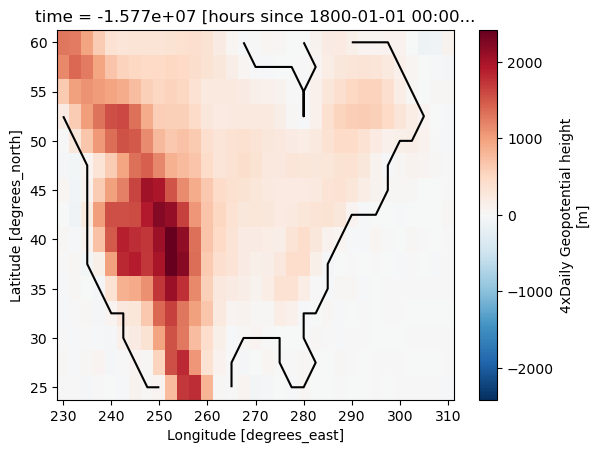

In [34]:
# Topography and coastline as seen in this crude dataset (2.5 deg) 

# "SLICES" in space and time. Notice latitude decreases in the lat variable!  

Zsfc. sel(lon=slice(230,310), lat=slice(60,25) ).plot()
coast.sel(lon=slice(230,310), lat=slice(60,25) ).plot.contour(levels=[0],colors='black')

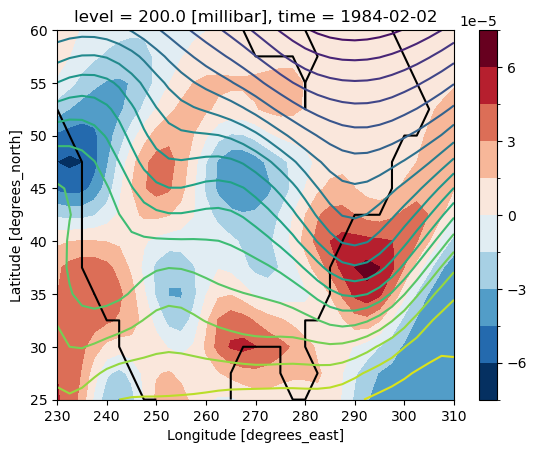

In [77]:
# Let's construct vorticity by differentiation of u and v, at a certain time

MYTIME = '1984-02-02T00'    # could be slice(time1,time2) if a range is wanted for animation or something

ucase200 = u.sel(lon=slice(230,310), lat=slice(60,25), time=MYTIME, level=200)
vcase200 = v.sel(lon=slice(230,310), lat=slice(60,25), time=MYTIME, level=200)
vor = ( -ucase200.differentiate('lat') + vcase200.differentiate('lon')*np.cos(ucase200.lat*np.pi/180.) )/111111.1 

# Plot it: 
vor.plot.contourf(levels=10)
coast.sel(lon=slice(230,310), lat=slice(60,25)                      )           .plot.contour(levels=[0], colors='black')
Z.sel    (lon=slice(230,310), lat=slice(60,25), time=MYTIME, level=200).plot.contour(levels=20)

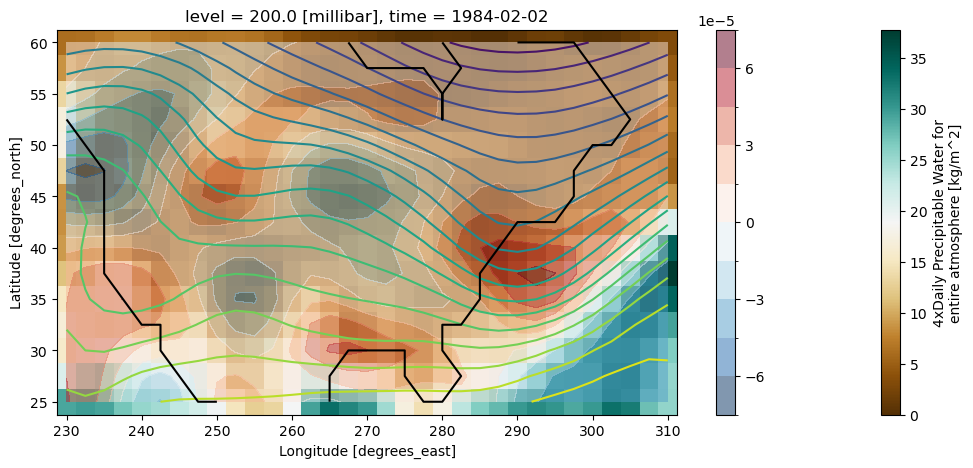

In [78]:
# Z200 over PW image, with coastline (so crude! Find Florida!)

PW.sel(   lon=slice(230,310), lat=slice(60,25), time=MYTIME)           .plot(aspect=2.5,size=5, cmap='BrBG' )
Z.sel    (lon=slice(230,310), lat=slice(60,25), time=MYTIME, level=200).plot.contour(levels=20)
coast.sel(lon=slice(230,310), lat=slice(60,25)                      )           .plot.contour(levels=[0], colors='black')

# overlay vorticity semi-transparent (alpha=0.5)
vor.plot.contourf(levels=10, alpha=0.5)

--------------

# Time-longitude of v wind (Rossby wave group velocity exercise)

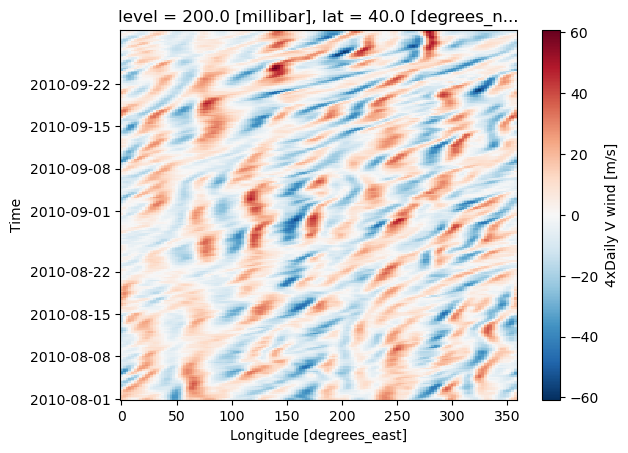

In [83]:
# Select v at some latitude, a time slice, a level

v.sel(level=200,time=slice('2010-08-01','2010-09-30'),lat=40).plot()

In [63]:
# How about IR satellite imagery from gridsat? Only since 1980, latitude order flipped, lon in [-180,180]
URL = 'https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat_agg/GridSat_B1_Aggregation_best.ncd'
IR = xr.open_dataset(URL).irwin_cdr 
IR

<xarray.DataArray 'irwin_cdr' (time1: 129259, lat: 2000, lon: 5143)>
[1329558074000 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 -70.0 -69.93 -69.86 -69.79 ... 69.79 69.86 69.93
  * lon        (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
  * time1      (time1) datetime64[ns] 1980-01-01 ... 2024-03-31T21:00:00
    time1_run  (time1) datetime64[ns] ...
Attributes:
    units:              Kelvin
    long_name:          NOAA FCDR of Brightness Temperature near 11 microns (...
    standard_name:      toa_brightness_temperature
    comment:            Nadir-most observations
    Note_A:             Calibration correction of Kanpp (2007) not applied
    Note_B:             The IRWIN_CDR data have been View Zenith corrected us...
    intergeo_cal_flag:  0
    _ChunkSizes:        [   1 2000 5143]

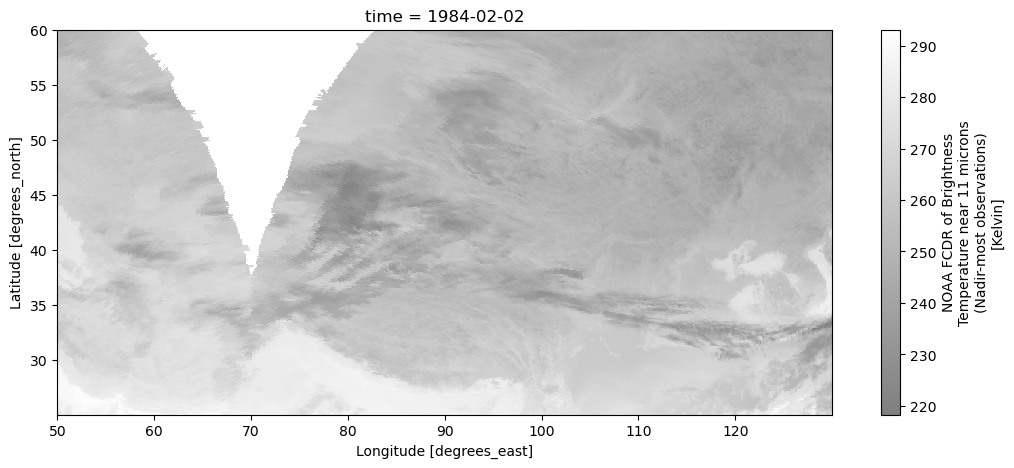

In [79]:
IR.sel   (lon=slice(230-180,310-180), lat=slice(25,60), time1=MYTIME).plot(aspect=2.5,size=5,  alpha=0.5, cmap='grey')

Z.sel    (lon=slice(230,310), lat=slice(60,25), time=MYTIME, level=200).plot.contour(levels=20)
coast.sel(lon=slice(230,310), lat=slice(60,25)                      )           .plot.contour(levels=[0], colors='black')
PW.sel(   lon=slice(230,310), lat=slice(60,25), time=MYTIME)           .plot.contour(levels=5 )

## HA, the overlays fail, MUST SEARCH FOR HOW TO HANDLE [-180,180] vs. [0,360] longitudes in xarray!

----------------
### MetPy has many functions. Web search it, study its docs. 
Can these long NCEP datasets be imported into its framework? Then vorticity wouldn't have to be calculated so manually as above... and sounding plots and so many other tools would be available.  

In [76]:
import metpy   # first you have to install it of course

---------------

# SST from [PSD, choose thredds catalog](https://psl.noaa.gov/data/gridded/index.html)

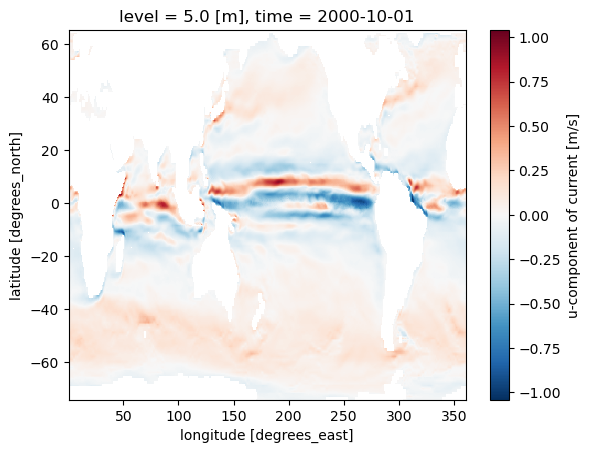

In [41]:
# Hey cool Ocean currents in GODAS ocean reanalysis 

URL = 'http://psl.noaa.gov/thredds/dodsC/Aggregations/godas/ucur.nc'
GODAS = xr.open_dataset(URL)
GODAS.ucur.sel(level=5, time='2000-10-01').plot()

# Unidata current weather grids 

In [3]:
# https://thredds.ucar.edu/thredds/catalog/catalog.html

# Best time series
ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best' )
ds

<xarray.Dataset>
Dimensions:                                                                     (
                                                                                 lat: 181,
                                                                                 lon: 360,
                                                                                 time: 366,
                                                                                 time1: 367,
                                                                                 time2: 366,
                                                                                 ...
                                                                                 depth_below_surface_layer_bounds_1: 2,
                                                                                 height_above_ground_layer_bounds_1: 2,
                                                                                 height_above_ground_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer2_bounds_1: 2,
                                                                                 sigma_layer_bounds_1: 2)
Coordinates: (12/31)
  * lat                                                                         (lat) float32 ...
  * lon                                                                         (lon) float32 ...
  * time                                                                        (time) datetime64[ns] ...
    reftime                                                                     (time) datetime64[ns] ...
  * time1                                                                       (time1) datetime64[ns] ...
    reftime1                                                                    (time1) datetime64[ns] ...
    ...                                                                          ...
  * isobaric1                                                                   (isobaric1) float32 ...
  * height_above_ground4                                                        (height_above_ground4) float32 ...
  * height_above_ground5                                                        (height_above_ground5) float32 ...
  * sigma                                                                       (sigma) float32 ...
  * hybrid                                                                      (hybrid) float32 ...
  * hybrid1                                                                     (hybrid1) float32 ...
Dimensions without coordinates: time2_bounds_1, time3_bounds_1,
                                pressure_difference_layer_bounds_1,
                                depth_below_surface_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                sigma_layer_bounds_1
Data variables: (12/180)
    LatLon_Projection                                                           int32 ...
    time2_bounds                                                                (time2, time2_bounds_1) datetime64[ns] ...
    time3_bounds                                                                (time3, time3_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                            (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    depth_below_surface_layer_bounds                                            (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                            (

In [23]:
onetime['u-component_of_wind_isobaric']

<xarray.DataArray 'u-component_of_wind_isobaric' (isobaric: 41, lat: 181,
                                                  lon: 360)>
array([[[ 4.147070e+00,  4.047071e+00, ...,  4.447070e+00,  4.347070e+00],
        [ 7.747070e+00,  7.447070e+00, ...,  8.247070e+00,  8.047071e+00],
        ...,
        [-1.352930e+00, -2.052930e+00, ...,  4.707031e-02, -6.529297e-01],
        [ 4.547071e+00,  3.847070e+00, ...,  5.947070e+00,  5.247070e+00]],

       [[ 4.199951e+00,  4.099951e+00, ...,  4.399951e+00,  4.299951e+00],
        [ 7.599951e+00,  7.399951e+00, ...,  8.199951e+00,  7.999951e+00],
        ...,
        [-3.900049e+00, -4.700049e+00, ..., -2.300049e+00, -3.100049e+00],
        [-1.500049e+00, -2.200049e+00, ..., -4.882813e-05, -7.000488e-01]],

       ...,

       [[-4.931917e+00, -4.991917e+00, ..., -4.821917e+00, -4.881917e+00],
        [-2.591917e+00, -2.711916e+00, ..., -2.361917e+00, -2.481916e+00],
        ...,
        [-2.421916e+00, -2.371917e+00, ..., -2.521916e+00, -2.471916e+00],
        [-1.916504e-03,  5.808350e-02, ..., -1.319165e-01, -7.191651e-02]],

       [[-4.114851e+00, -4.174851e+00, ..., -3.984851e+00, -4.044851e+00],
        [-1.314851e+00, -1.494851e+00, ..., -9.348511e-01, -1.124851e+00],
        ...,
        [-2.424851e+00, -2.374851e+00, ..., -2.524851e+00, -2.474851e+00],
        [-4.851074e-03,  5.514893e-02, ..., -1.348511e-01, -6.485108e-02]]],
      dtype=float32)
Coordinates:
  * lat       (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * lon       (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    time1     datetime64[ns] 2023-11-07
    reftime1  datetime64[ns] ...
  * isobaric  (isobaric) float32 1.0 2.0 4.0 7.0 ... 9.5e+04 9.75e+04 1e+05
Attributes: (12/13)
    long_name:                       u-component of wind @ Isobaric surface
    units:                           m/s
    abbreviation:                    UGRD
    grid_mapping:                    LatLon_Projection
    Grib_Variable_Id:                VAR_7-0--1-2_L100
    Grib2_Parameter:                 [0 2 2]
    ...                              ...
    Grib2_Parameter_Category:        Momentum
    Grib2_Parameter_Name:            u-component of wind
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

array(291.7977, dtype=float32)

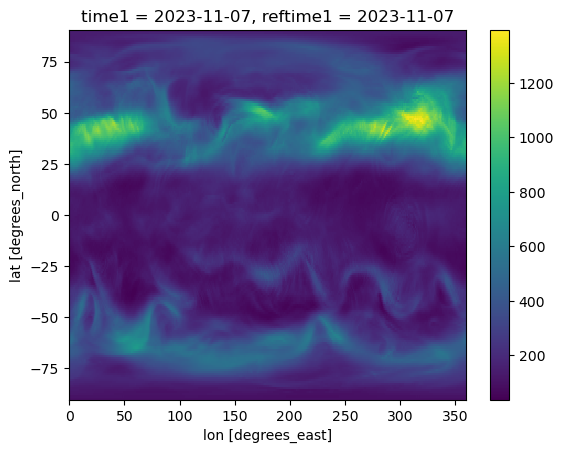

In [29]:
onetime = ds.sel(time1='2023-11-07-00')
globalKE =0.5*( onetime['u-component_of_wind_isobaric']**2 +\
                onetime['v-component_of_wind_isobaric']**2)
globalKE.mean(dim='isobaric').plot() # J/kg, mean is 291.79769897
globalKE.mean().values # J/kg, mean is 291.79769897

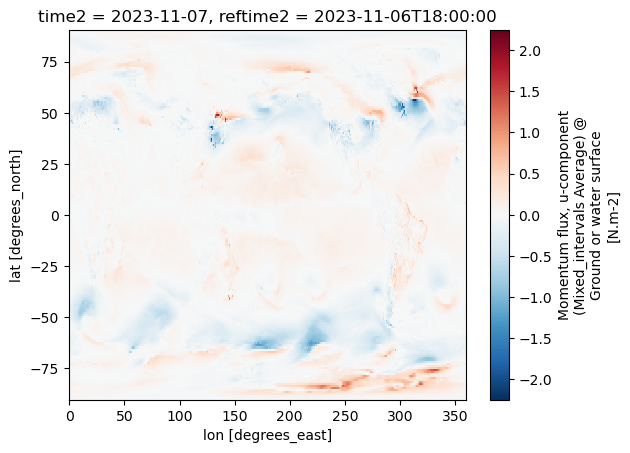

In [30]:
# Friction (N/m2) -0.00826 for v, -0.00424 for u 
twotime = ds.sel(time2='2023-11-07-00')
twotime['Momentum_flux_u-component_surface_Mixed_intervals_Average'].mean()
twotime['Momentum_flux_u-component_surface_Mixed_intervals_Average'].plot()


# NCAR [RDA grids, catalog here](https://rda.ucar.edu/thredds/catalog/catalog.html )
### SO MANY DATASETS! 

In [11]:
# GFS 0.25 degree massive aggregation: crazy too many things in one dataset... 

testURL = 'https://rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.3/1/TP'
ds = xr.open_dataset(testURL)
ds

<xarray.Dataset>
Dimensions:                                                                     (
                                                                                 lat: 721,
                                                                                 lon: 1440,
                                                                                 time: 33663,
                                                                                 time1: 19552,
                                                                                 time2: 21916,
                                                                                 ...
                                                                                 depth_below_surface_layer_bounds_1: 2,
                                                                                 height_above_ground_layer_bounds_1: 2,
                                                                                 pressure_difference_layer1_bounds_1: 2,
                                                                                 sigma_layer_bounds_1: 2,
                                                                                 height_above_ground_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer2_bounds_1: 2)
Coordinates: (12/27)
  * lat                                                                         (lat) float32 ...
  * lon                                                                         (lon) float32 ...
  * time                                                                        (time) datetime64[ns] ...
    reftime                                                                     (time) datetime64[ns] ...
  * potential_vorticity_surface                                                 (potential_vorticity_surface) float32 ...
  * isobaric                                                                    (isobaric) float32 ...
    ...                                                                          ...
  * pressure_difference_layer2                                                  (pressure_difference_layer2) float32 ...
  * height_above_ground4                                                        (height_above_ground4) float32 ...
  * altitude_above_msl                                                          (altitude_above_msl) float32 ...
  * height_above_ground5                                                        (height_above_ground5) float32 ...
  * isobaric3                                                                   (isobaric3) float32 ...
  * altitude_above_msl1                                                         (altitude_above_msl1) float32 ...
Dimensions without coordinates: time1, time2, time3, time4, time5, time6,
                                time7, time8, time9, time10, time11, time12,
                                time3_bounds_1, time7_bounds_1, time8_bounds_1,
                                time11_bounds_1,
                                pressure_difference_layer_bounds_1,
                                depth_below_surface_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1
Data variables: (12/212)
    validtime1                                                                  (time1) datetime64[ns] ...
    refvalidtime1                                                               (time1) datetime64[ns] ...
    validtime2                                                                  (time2) datetime64[ns] ...
    refvalidtime2                                                               (time2) datetime64[ns] ...
    validtime3        

In [15]:
# ERA5 Z500 on my birthday, have to construct URL by day 

test_URL = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/196402/e5.oper.an.pl.128_129_z.ll025sc.1964020200_1964020223.nc'
ds = xr.open_dataset(test_URL)
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 37, longitude: 1440, time: 24)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1964-02-02 ... 1964-02-02T23:00:00
Data variables:
    utc_date   (time) int32 ...
    Z          (time, level, latitude, longitude) float32 ...
Attributes:
    DATA_SOURCE:                     ECMWF: https://cds.climate.copernicus.eu...
    NETCDF_CONVERSION:               CISL RDA: Conversion from ECMWF GRIB 1 d...
    NETCDF_VERSION:                  4.8.1
    CONVERSION_PLATFORM:             Linux r1i6n24 4.12.14-95.51-default #1 S...
    CONVERSION_DATE:                 Sun Aug 21 21:02:39 MDT 2022
    Conventions:                     CF-1.6
    NETCDF_COMPRESSION:              NCO: Precision-preserving compression to...
    history:                         Sun Aug 21 21:03:07 2022: ncks -4 --ppc ...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.10.8
    DODS_EXTRA.Unlimited_Dimension:  time

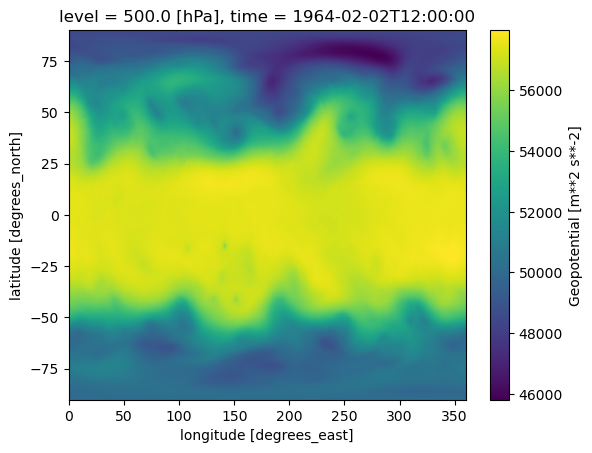

In [18]:
ds.Z.sel(level='500', time='1964-02-02-12').plot()

# MERRA2 GDS grids: requires authentication

In [33]:
# MERRA : authenticated services 
# Instructions here: https://disc.gsfc.nasa.gov/information/documents?title=Data%20Access

# Pre-requisite files can be created by executing this notebook 
# https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20Generate%20Earthdata%20Prerequisite%20Files

testURL = 'https://goldsmr5.gesdisc.eosdis.nasa.gov/dods/M2I3NPASM'
ds = xr.open_dataset(testURL)
ds

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.


RuntimeError: Failed to decode variable 'time': NetCDF: Access failure

In [14]:
onetime200 = ds.sel(time='2001-01-01 00:00:00', lev='200')

In [15]:
onetime200

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576)
Coordinates:
    time     datetime64[ns] 2001-01-01
    lev      float64 200.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables: (12/14)
    epv      (lat, lon) float32 ...
    h        (lat, lon) float32 ...
    o3       (lat, lon) float32 ...
    omega    (lat, lon) float32 ...
    phis     (lat, lon) float32 ...
    ps       (lat, lon) float32 ...
    ...       ...
    qv       (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    slp      (lat, lon) float32 ...
    t        (lat, lon) float32 ...
    u        (lat, lon) float32 ...
    v        (lat, lon) float32 ...
Attributes:
    title:        MERRA-2 inst3_3d_asm_Np: 3d,3-Hourly,Instantaneous,Pressure...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Tue Feb 01 21:53:10 GMT 2022 : imported by GrADS Data Serve...

In [20]:
onetime200.h[0]

<xarray.DataArray 'h' (lon: 576)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    time     datetime64[ns] 2001-01-01
    lev      float64 200.0
    lat      float64 -90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    units:      m
    long_name:  edge heights m

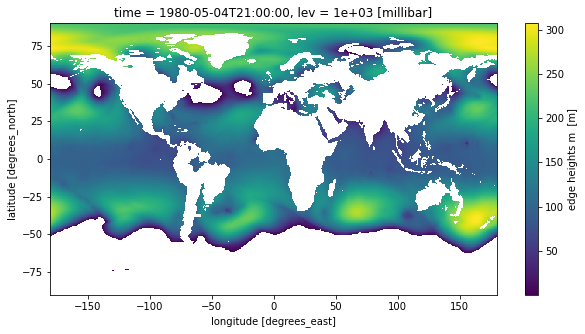

In [34]:
ds.h[999][0].plot(size=5, aspect=2)

<a id='NCEIgridsat'></a>

# NCEI catalog: all the satellite images 3-hourly since 1980! 
https://www.ncei.noaa.gov/thredds/catalog.html


In [35]:
# How about satellite imagery from gridsat? 
URL = 'https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat_agg/GridSat_B1_Aggregation_best.ncd'
sat = xr.open_dataset(URL)
sat

# Gives errors, but also works sorta? 
#Dimensions:        (lat: 2000, lon: 5143, sparse2ir: 2, sparse2wv: 2,
#                    sparse2vs: 2, sparse3ir: 846374, time: 88221,
#                    time1: 121219, time_1: 1, Ngeo: 5)

<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 5143, sparse2ir: 2, sparse2wv: 2,
                    sparse2vs: 2, sparse3ir: 761105, time: 94797,
                    time1: 127795, time_1: 1, Ngeo: 5)
Coordinates:
  * lat            (lat) float32 -70.0 -69.93 -69.86 ... 69.79 69.86 69.93
  * lon            (lon) float32 -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
  * sparse2ir      (sparse2ir) int32 0 1
  * sparse2wv      (sparse2wv) int32 0 1
  * sparse2vs      (sparse2vs) int32 0 1
  * sparse3ir      (sparse3ir) int32 907527 907528 912669 ... 9259775 9259780
  * time           (time) datetime64[ns] 1980-02-09T09:00:00 ... 2023-09-30T2...
    time_run       (time) datetime64[ns] ...
  * time1          (time1) datetime64[ns] 1980-01-01 ... 2023-09-30T21:00:00
    time1_run      (time1) datetime64[ns] ...
Dimensions without coordinates: time_1, Ngeo
Data variables: (12/27)
    satlat         (time_1, Ngeo) float32 ...
    satlon         (time_1, Ngeo) float32 ...
    satrad         (time_1, Ngeo) float32 ...
    satname        (time_1, Ngeo) |S64 ...
    b1ufile        (time_1, Ngeo) |S64 ...
    b1file         (time_1, Ngeo) |S64 ...
    ...             ...
    vschn          (time1, lat, lon) float32 ...
    vschn_2        (time1, lat, lon) float32 ...
    satid_ir       (time1, lat, lon) float32 ...
    satid_wv       (time1, lat, lon) int8 ...
    satid_vs       (time1, lat, lon) int8 ...
    irwin_vza_adj  (time1, lat, lon) float32 ...
Attributes: (12/56)
    title:                      GridSat-B1 - Gridded Satellite (GridSat) ISCC...
    summary:                    Geostationary data are remapped to equal angl...
    Conventions:                CF-1.4
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    references:                 http://dx.doi.org/10.1175/2011BAMS3039.1  htt...
    source:                     ISCCP.B1U.a.GOE-16.2023.09.30.1750.NOA,ISCCP....
    ...                         ...
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    featureType:                GRID
    location:                   Proto fmrc:GridSat_B1_Aggregation
    history:                    FMRC Best Dataset
    DODS.strlen:                50
    DODS.dimName:               StrLen

In [52]:
fred_day = sat.sel( lon=slice(-120,-50),lat=slice(20,50),time1=slice('2020-07-23-06','2020-07-24-00'))
fred_day

<xarray.Dataset>
Dimensions:        (lat: 429, lon: 1000, sparse2ir: 2, sparse2wv: 2,
                    sparse2vs: 2, sparse3ir: 761105, time: 94797, time1: 7,
                    time_1: 1, Ngeo: 5)
Coordinates:
  * lat            (lat) float32 20.02 20.09 20.16 20.23 ... 49.84 49.91 49.98
  * lon            (lon) float32 -119.9 -119.9 -119.8 ... -50.15 -50.08 -50.01
  * sparse2ir      (sparse2ir) int32 0 1
  * sparse2wv      (sparse2wv) int32 0 1
  * sparse2vs      (sparse2vs) int32 0 1
  * sparse3ir      (sparse3ir) int32 907527 907528 912669 ... 9259775 9259780
  * time           (time) datetime64[ns] 1980-02-09T09:00:00 ... 2023-09-30T2...
    time_run       (time) datetime64[ns] ...
  * time1          (time1) datetime64[ns] 2020-07-23T06:00:00 ... 2020-07-24
    time1_run      (time1) datetime64[ns] ...
Dimensions without coordinates: time_1, Ngeo
Data variables: (12/27)
    satlat         (time_1, Ngeo) float32 ...
    satlon         (time_1, Ngeo) float32 ...
    satrad         (time_1, Ngeo) float32 ...
    satname        (time_1, Ngeo) |S64 ...
    b1ufile        (time_1, Ngeo) |S64 ...
    b1file         (time_1, Ngeo) |S64 ...
    ...             ...
    vschn          (time1, lat, lon) float32 ...
    vschn_2        (time1, lat, lon) float32 ...
    satid_ir       (time1, lat, lon) float32 ...
    satid_wv       (time1, lat, lon) int8 ...
    satid_vs       (time1, lat, lon) int8 ...
    irwin_vza_adj  (time1, lat, lon) float32 ...
Attributes: (12/56)
    title:                      GridSat-B1 - Gridded Satellite (GridSat) ISCC...
    summary:                    Geostationary data are remapped to equal angl...
    Conventions:                CF-1.4
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    references:                 http://dx.doi.org/10.1175/2011BAMS3039.1  htt...
    source:                     ISCCP.B1U.a.GOE-16.2023.09.30.1750.NOA,ISCCP....
    ...                         ...
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    featureType:                GRID
    location:                   Proto fmrc:GridSat_B1_Aggregation
    history:                    FMRC Best Dataset
    DODS.strlen:                50
    DODS.dimName:               StrLen

In [70]:
list(fred_day.keys())[0:16]

['satlat',
 'satlon',
 'satrad',
 'satname',
 'b1ufile',
 'b1file',
 'calslp_irwin',
 'caloff_irwin',
 'calslp_irwvp',
 'caloff_irwvp',
 'vis_rad_slope',
 'vis_dc_slope',
 'vis_dc_offset',
 'satid_ir3',
 'time_offset',
 'time1_offset']

In [79]:
imagery = fred_day.drop_vars( list(fred_day.keys())[0:16] )
IRonly = imagery.drop_vars( list(imagery.keys())[1:] )
IRonly.to_netcdf('~/Downloads/FredIR.nc')

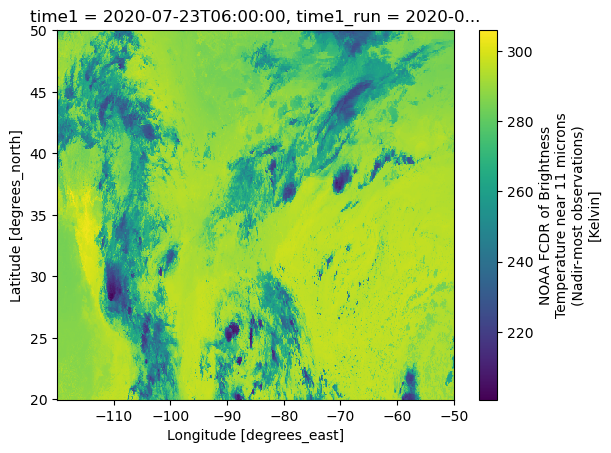

In [49]:
sat.sel(lon=slice(-120,-50),lat=slice(20,50), time1='2020-07-23-06').irwin_cdr.plot()

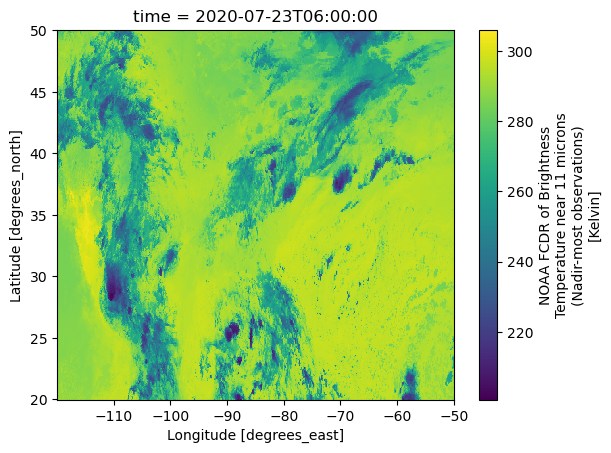

In [34]:
# Single Year GridSat file
URL = 'https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2020/GRIDSAT-B1.2020.07.23.06.v02r01.nc'
ds = xr.open_dataset(URL)
ds.sel(lon=slice(-120,-50),lat=slice(20,50)).irwin_cdr.plot()

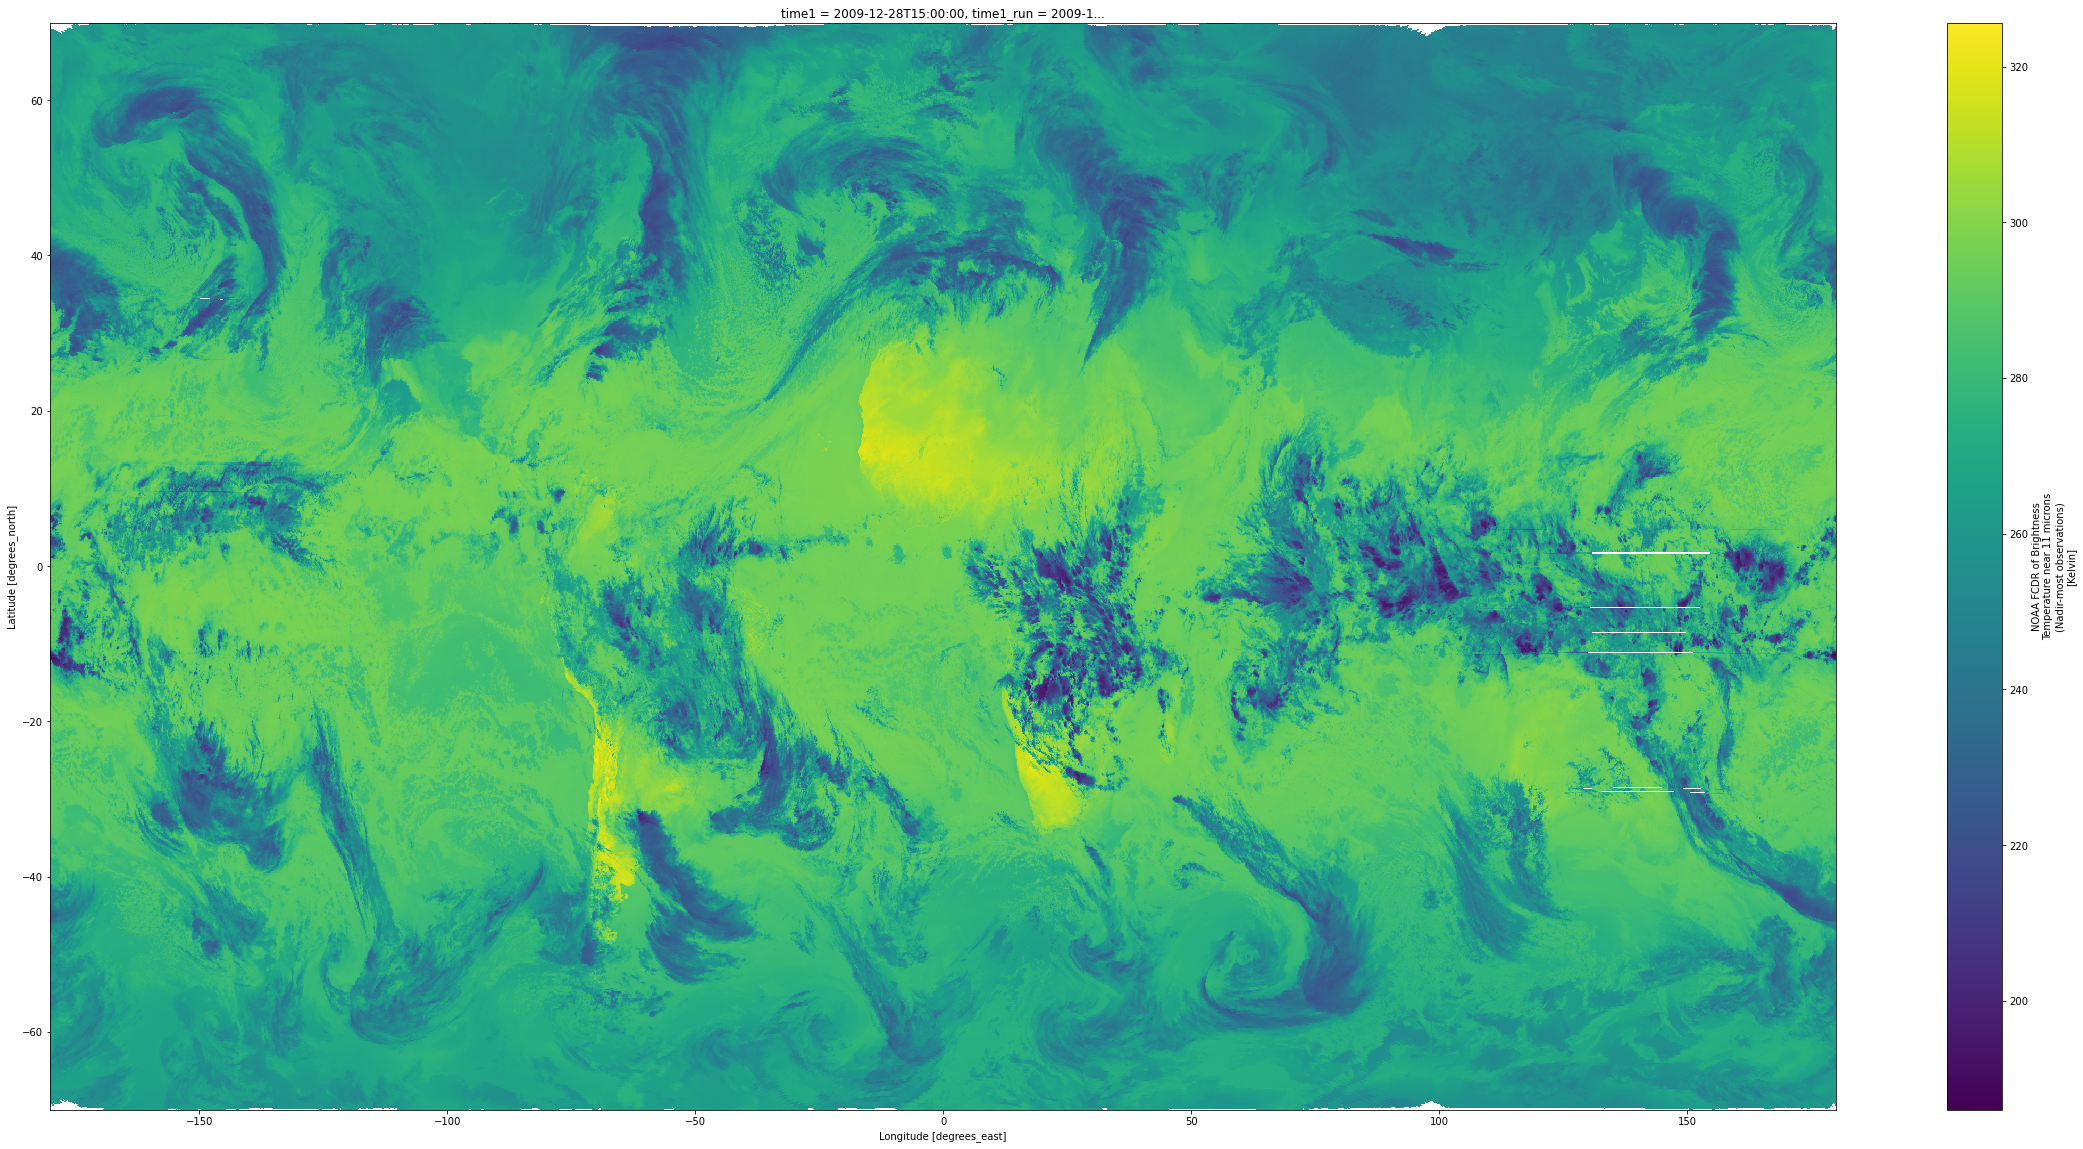

In [21]:
# 30 years into the dataset: 
ds.irwin_cdr[365*8*30].plot(size=20,aspect=2)

In [34]:
# Daily summaries of ISCCP satellite data 

testURL = 'https://www.ncei.noaa.gov/thredds/dodsC/cdr/isccp_hgh_agg/ISCCP-H_Aggregation_Basic_Gridded_By_Hour_(HGH)_best.ncd'
ISCCPH = xr.open_dataset(testURL)
ISCCPH

<xarray.Dataset>
Dimensions:             (lon: 360, lat: 180, time: 3264, satpos: 12, edge: 2,
                         cldbin: 10, cloud_irtype: 3, cloud_type: 18,
                         time_1: 1, bounds_dim: 2)
Coordinates:
  * lon                 (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time                (time) datetime64[ns] 1983-07-31 ... 2017-06-30T21:00:00
    time_run            (time) datetime64[ns] ...
Dimensions without coordinates: satpos, edge, cldbin, cloud_irtype, cloud_type,
                                time_1, bounds_dim
Data variables: (12/46)
    satcodes            (satpos) int16 ...
    satids              (satpos) |S64 ...
    satnames            (satpos) |S64 ...
    lon_bounds          (lon, edge) float32 ...
    lat_bounds          (lat, edge) float32 ...
    cldbin_bounds       (cldbin, edge) int32 ...
    ...                  ...
    tau_ir              (time, lat, lon) float32 ...
    sigma_tau_space     (time, lat, lon) float32 ...
    wp_ir               (time, lat, lon) float32 ...
    sigma_wp_space      (time, lat, lon) float32 ...
    cldamt_irmarg       (time, lat, lon) float32 ...
    snoice              (time, lat, lon) float32 ...
Attributes: (12/71)
    Conventions:                              CF-1.4, ACDD-1.3
    summary:                                  The HGH product represents hour...
    keywords:                                 EARTH SCIENCE > ATMOSPHERE > AT...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    platform_vocabulary:                      NASA Global Change Master Direc...
    instrument_vocabulary:                    NASA Global Change Master Direc...
    ...                                       ...
    NCO:                                      netCDF Operators version 4.7.5 ...
    _CoordSysBuilder:                         ucar.nc2.dataset.conv.CF1Conven...
    featureType:                              GRID
    location:                                 Proto fmrc:ISCCP-H_Aggregation_...
    DODS.strlen:                              80
    DODS.dimName:                             label_len

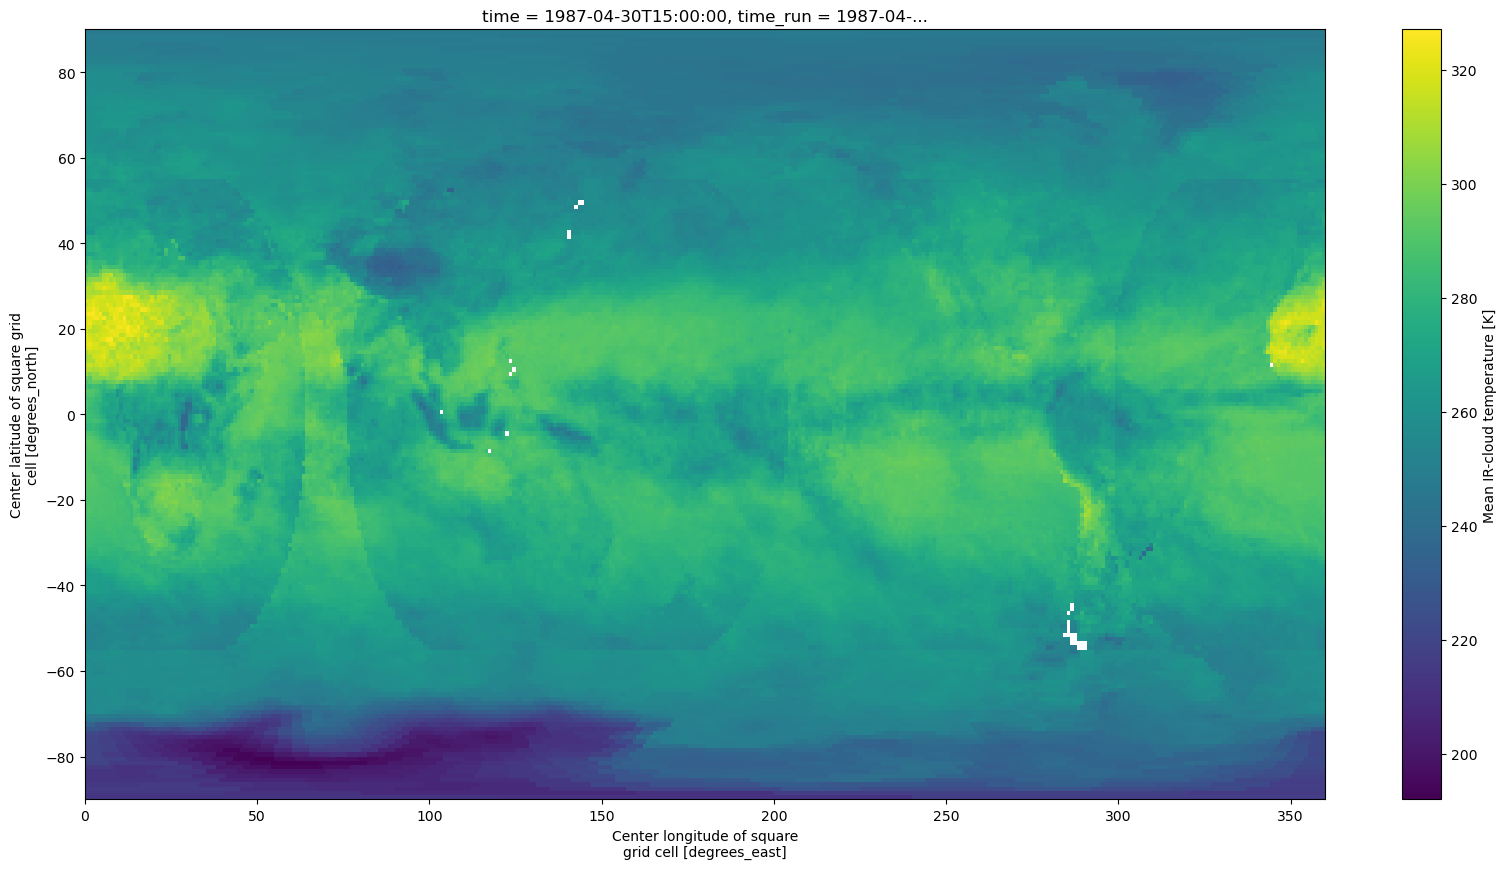

In [39]:
ISCCPH.tc_ir[365].plot(size=10,aspect=2)

In [48]:
# climatology of temperature: the January thaw? 

climT = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.day.ltm.nc', decode_times=False)
climT

<xarray.Dataset>
Dimensions:             (lat: 73, lon: 144, time: 365, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) float64 -1.577e+07 -1.577e+07 ... -1.576e+07
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    air                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    title:                          mean daily NMC reanalysis
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    history:                        Created 2021/07/26 by doDayLTMNC4
    dataset_title:                  NCEP-NCAR Reanalysis 1
    References:                     http://www.psl.noaa.gov/data/gridded/data...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    _NCProperties:                  version=2,netcdf=4.7.0,hdf5=1.10.5,

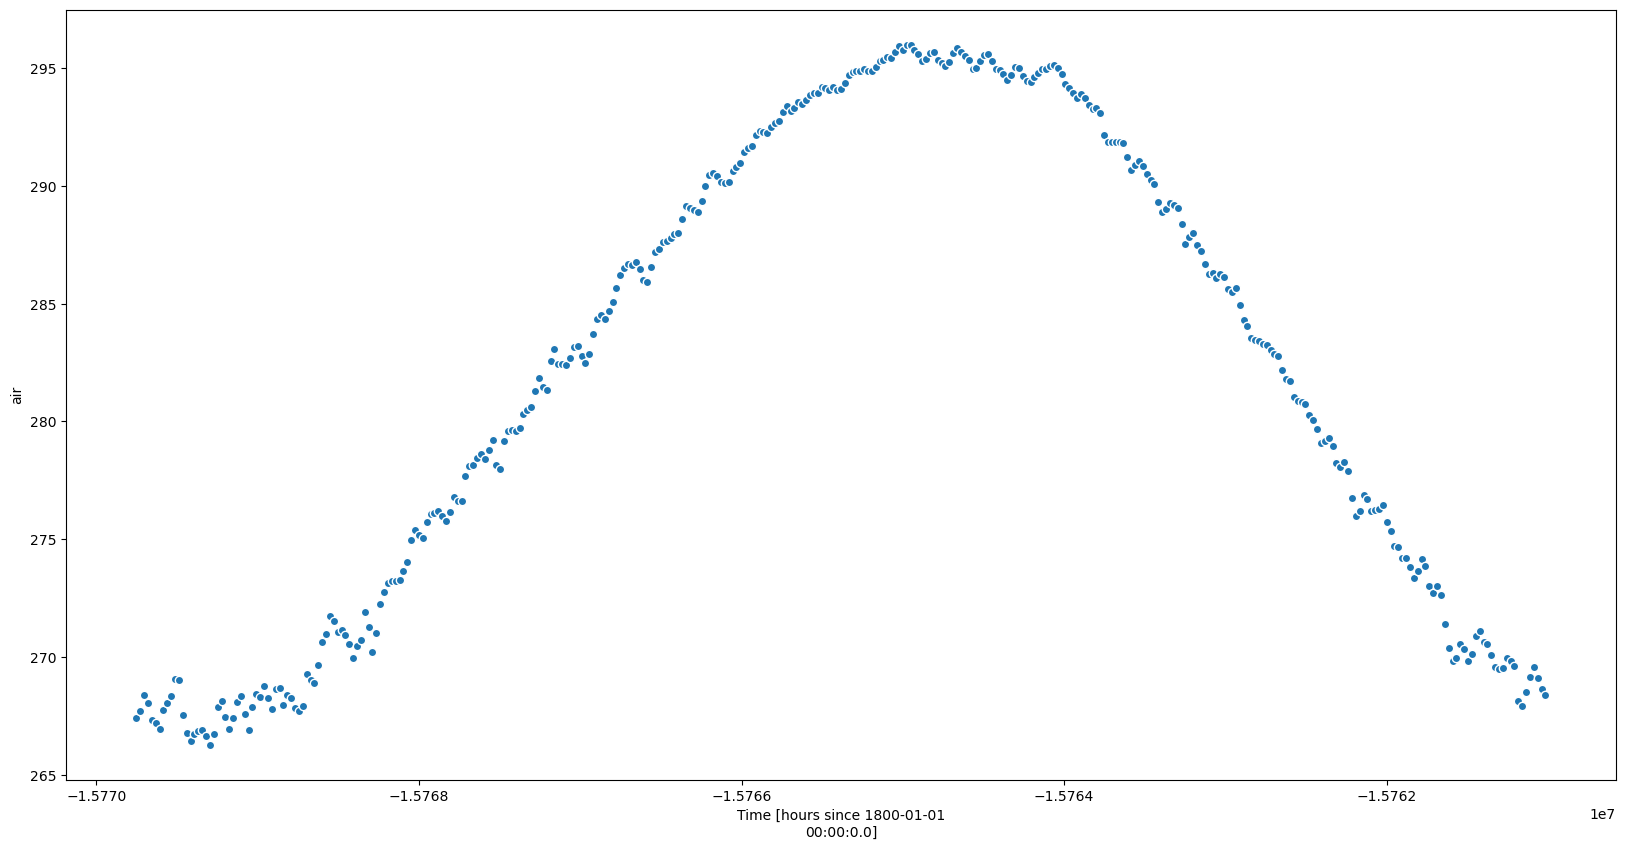

In [52]:
climT.sel(lat=slice(50,35),lon=slice(360-100,360-80)).mean(dim=['lat','lon']).air.plot.scatter(size=10,aspect=2)